# Segmentation de la clientèle d'une banque

 Cet ensemble de données trouvé sur kaggle contient des informations sur les clients d'une agence bancaire, Le but de ce projet est de les segmenter en différents groupes afin d'appliquer des stratégies commerciales adaptées à chaque type de client. 
 Par exemple, l'entreprise pourrait proposer des limites de crédit plus élevées aux clients qui utilisent beaucoup la carte, mais dépensent peu, ou même créer des incitations pour les personnes à revenus élevés qui n'utilisent pas la carte autant que prévu. Afin d'appliquer différentes stratégies, l'entreprise a besoin de différents groupes de clients.
 Pour ce projet nous utiliserons l'algorithme des k-moyennes pour segmenter les données.
 Les étapes de ce projet sont : 

* Analyser l'ensemble de données ;
* Préparer les données pour la modélisation ;
* Trouver un nombre approprié de clusters ;
* Segmenter les données ;
* Interpréter et expliquer les résultats.

## 1. Importation des librairies et nettoyage

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
colonnes_utiles = [
    'Customer_Age',
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Credit_Limit',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio'
]

df = df[colonnes_utiles]

df.rename(columns={
    'Customer_Age': 'age',
    'Gender': 'gender',
    'Dependent_count': 'dependent_count',
    'Education_Level': 'education_level',
    'Marital_Status': 'marital_status',
    'Income_Category': 'estimated_income',
    'Months_on_book': 'months_on_book',
    'Total_Relationship_Count': 'total_relationship_count',
    'Months_Inactive_12_mon': 'months_inactive_12_mon',
    'Credit_Limit': 'credit_limit',
    'Total_Trans_Amt': 'total_trans_amount',
    'Total_Trans_Ct': 'total_trans_count',
    'Avg_Utilization_Ratio': 'avg_utilization_ratio'
}, inplace=True)

print(df.head())

df.to_csv('credit_card_customers.csv', index=False)

   age gender  dependent_count education_level marital_status  \
0   45      M                3     High School        Married   
1   49      F                5        Graduate         Single   
2   51      M                3        Graduate        Married   
3   40      F                4     High School        Unknown   
4   40      M                3      Uneducated        Married   

  estimated_income  months_on_book  total_relationship_count  \
0      $60K - $80K              39                         5   
1   Less than $40K              44                         6   
2     $80K - $120K              36                         4   
3   Less than $40K              34                         3   
4      $60K - $80K              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1                       1        8256.0                1291   
2                       1        34

In [5]:
df.info() #aucune valeur nulle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  object 
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 1.0+ MB


In [6]:
df['estimated_income'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [7]:
df = df.copy()
df['estimated_income'] = df['estimated_income'].replace({
    'Less than $40K': 24000,
    '$40K - $60K': 50000,
    '$60K - $80K': 69000,
    '$80K - $120K': 93000,
    '$120K +': 130000,
    'Unknown': np.nan
})
df['estimated_income'] = df['estimated_income'].astype(float)

/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_81691/2506249552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['estimated_income'] = df['estimated_income'].replace({


## 2. Analyse exploratoire des données

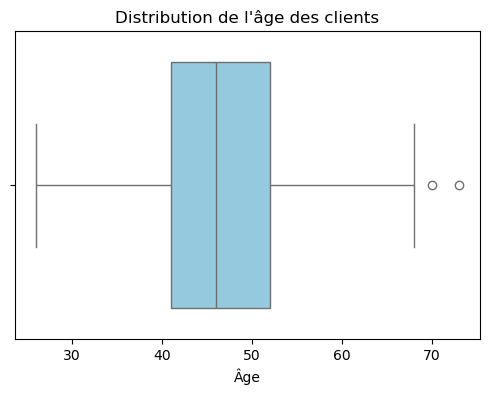

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='age', color='skyblue')
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.show()

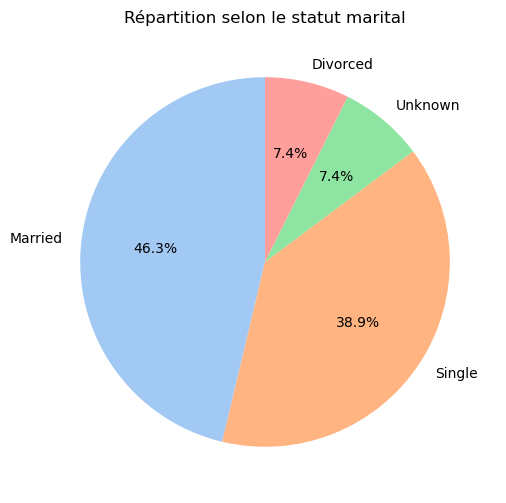

In [9]:
plt.figure(figsize=(6,6))
df['marital_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Répartition selon le statut marital')
plt.ylabel('')  
plt.show()

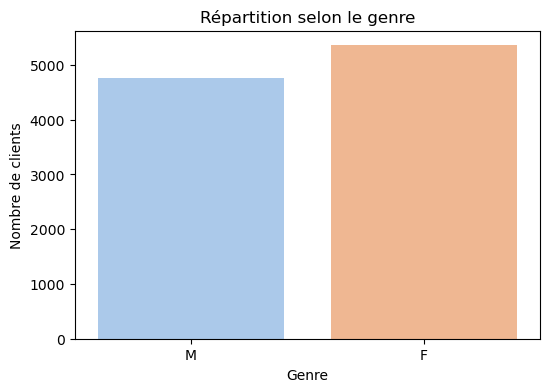

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='gender', palette='pastel', legend=False)
plt.title('Répartition selon le genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.show()

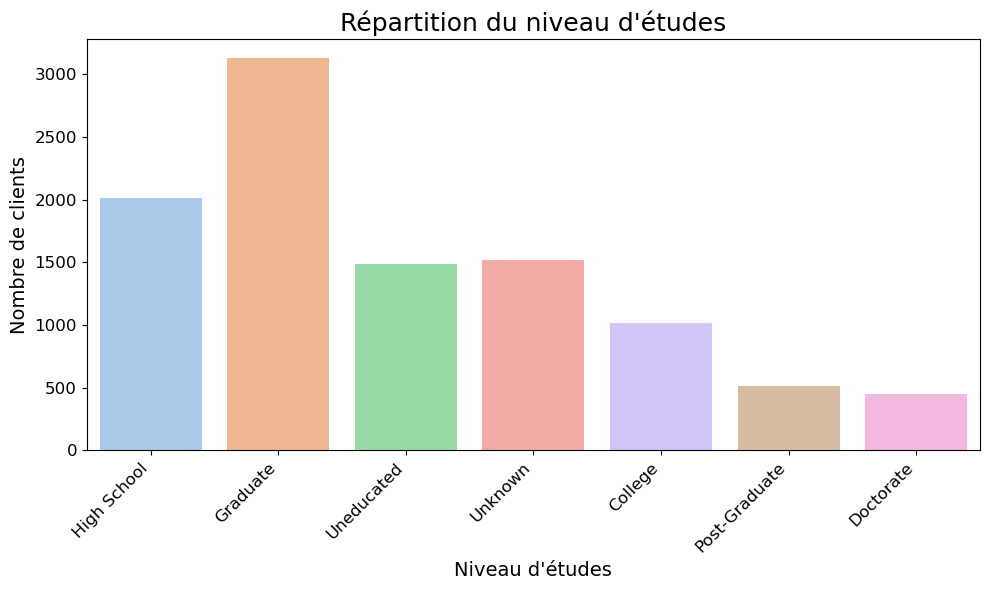

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education_level', hue='education_level', palette='pastel', legend=False)
plt.title('Répartition du niveau d\'études', fontsize=18)
plt.xlabel('Niveau d\'études', fontsize=14)
plt.ylabel('Nombre de clients', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [12]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,9015.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,56457.792568,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,33354.733388,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,24000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,24000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,93000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,130000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


Il n'y a pas de valeur abberantes. Les premières analyses qu'on peut faire et que les clients sont très bien réparties en terme de sexe

/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_81691/3378078714.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


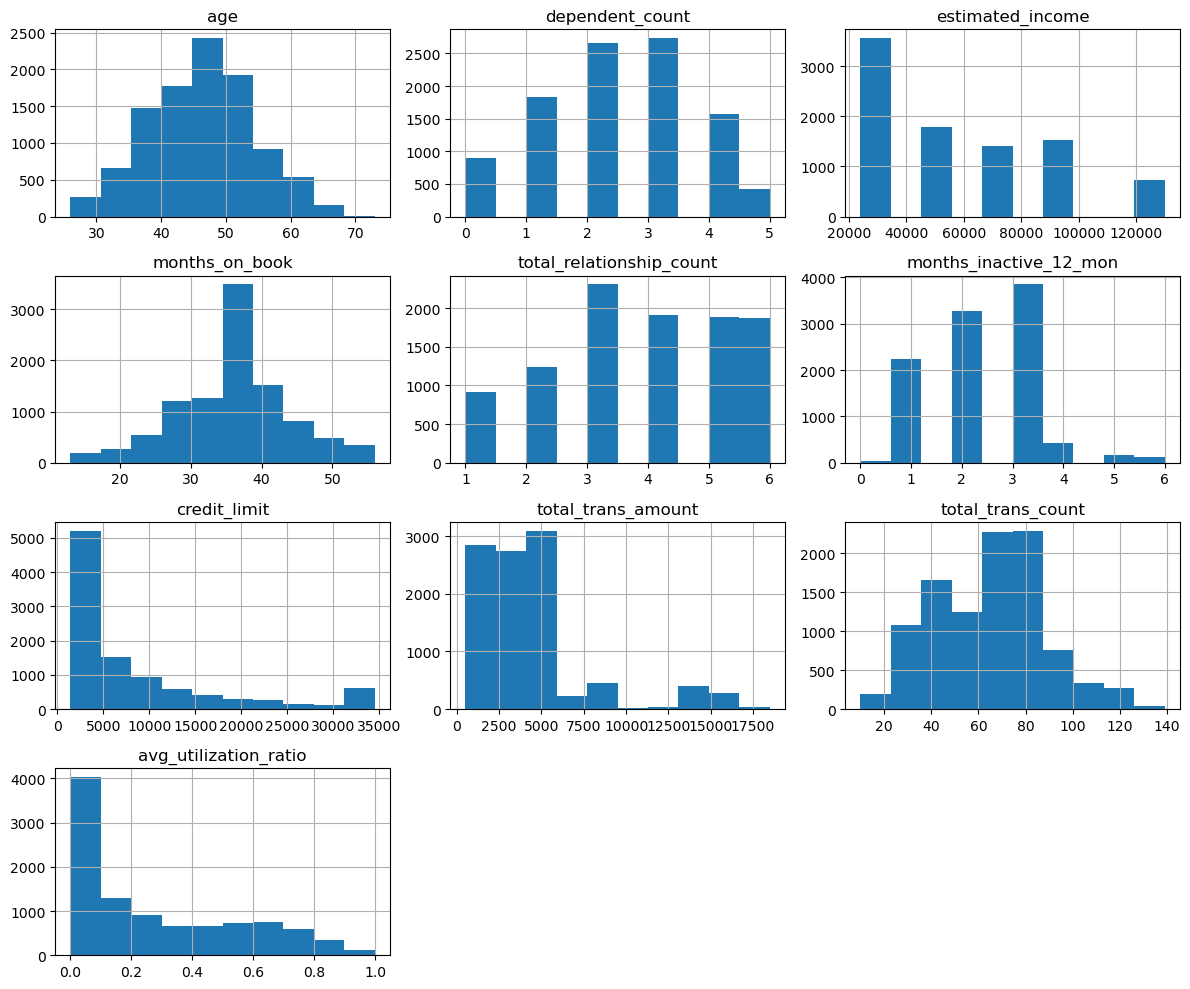

In [13]:
fig, ax = plt.subplots(figsize = (12,10))
df.hist(ax=ax)
plt.tight_layout()
plt.show();

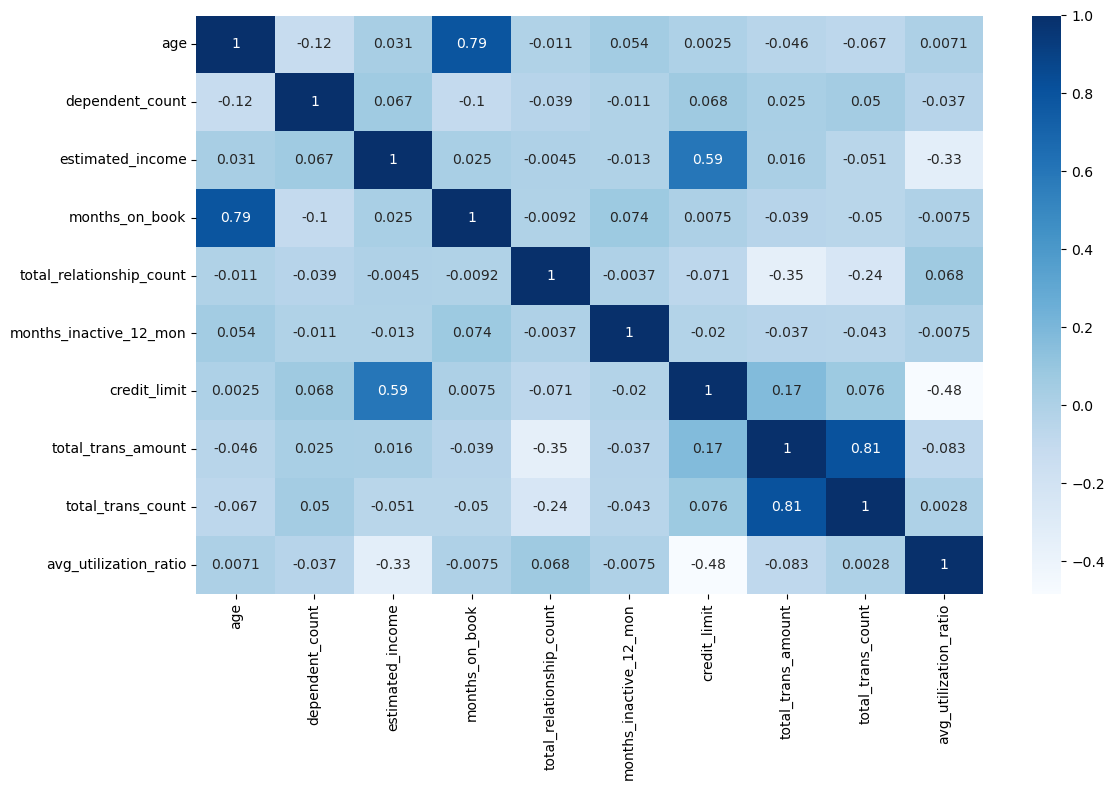

In [14]:
correlations = df.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations,cmap = 'Blues', annot = True, ax = ax)
plt.tight_layout()
plt.show()

Cette matrice de corrélation nous permet de voir certaines relations entre les variables:
1. Revenu estimé (estimated_income) et Limite de Crédit (credit_limit)

Corrélation forte (+0.59) :
Plus le revenu estimé d'un client est élevé, plus sa limite de crédit est haute. Ceci est logique car les banques ajustent les plafonds de crédit en fonction de la solvabilité.

2. Âge (age) et Ancienneté (months_on_book)

Corrélation très forte (+0.79) :
Les clients plus âgés restent fidèles à la banque plus longtemps. Cela suggère une relation de confiance sur le long terme.

3. Transactions (total_trans_count) et Montant des Transactions (total_trans_amount)

Corrélation extrêmement forte (+0.81) :
Les clients qui effectuent beaucoup de transactions dépensent aussi des montants élevés. Ce sont des profils "actifs" idéaux pour les cartes de crédit à cashback.

4. Taux d'Utilisation du Crédit (avg_utilization_ratio) et Revenu (estimated_income)
Corrélation négative (-0.33) :
Les clients à revenu élevé utilisent moins leur limite de crédit (ratio d'utilisation bas). Ils dépendent moins du crédit.


## 3. transformation des données pour notre modèle

In [15]:
clients = df.copy()
clients['gender'] = df['gender'].apply(lambda x : 1 if x == 'M' else 0)
clients.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,45,1,3,High School,Married,69000.0,39,5,1,12691.0,1144,42,0.061
1,49,0,5,Graduate,Single,24000.0,44,6,1,8256.0,1291,33,0.105
2,51,1,3,Graduate,Married,93000.0,36,4,1,3418.0,1887,20,0.000
3,40,0,4,High School,Unknown,24000.0,34,3,4,3313.0,1171,20,0.760
4,40,1,3,Uneducated,Married,69000.0,21,5,1,4716.0,816,28,0.000


In [16]:
clients['education_level'] = clients['education_level'].replace('Unknown', clients['education_level'].mode()[0])
education = { 'Uneducated': 0, 'High School' : 1, 'College' : 2, 
             'Graduate': 3, 'Post-Graduate' : 4, 'Doctorate': 5}
clients['education_level'] = clients['education_level'].map(education)
clients.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,45,1,3,1,Married,69000.0,39,5,1,12691.0,1144,42,0.061
1,49,0,5,3,Single,24000.0,44,6,1,8256.0,1291,33,0.105
2,51,1,3,3,Married,93000.0,36,4,1,3418.0,1887,20,0.000
3,40,0,4,1,Unknown,24000.0,34,3,4,3313.0,1171,20,0.760
4,40,1,3,0,Married,69000.0,21,5,1,4716.0,816,28,0.000


In [17]:
dummies = pd.get_dummies(clients[['marital_status']])
clients = pd.concat([clients, dummies], axis =1)
clients.drop(['marital_status'], axis = 1, inplace = True)
print(clients.info())
clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  int64  
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  int64  
 4   estimated_income          9015 non-null   float64
 5   months_on_book            10127 non-null  int64  
 6   total_relationship_count  10127 non-null  int64  
 7   months_inactive_12_mon    10127 non-null  int64  
 8   credit_limit              10127 non-null  float64
 9   total_trans_amount        10127 non-null  int64  
 10  total_trans_count         10127 non-null  int64  
 11  avg_utilization_ratio     10127 non-null  float64
 12  marital_status_Divorced   10127 non-null  bool   
 13  marital_status_Married    10127 non-null  bool   
 14  marita

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000.0,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,49,0,5,3,24000.0,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,51,1,3,3,93000.0,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,40,0,4,1,24000.0,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,40,1,3,0,69000.0,21,5,1,4716.0,816,28,0.000,False,True,False,False


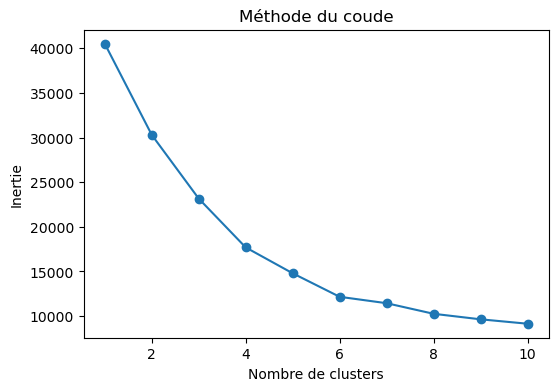

In [18]:
from sklearn.impute import SimpleImputer

features = ['age', 'credit_limit', 'total_trans_amount', 'avg_utilization_ratio']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


Cluster 0:
age                        38.795558
credit_limit             2764.319464
total_trans_amount       3599.788374
avg_utilization_ratio       0.620153
dtype: float64

Cluster 1:
age                        53.828198
credit_limit             7021.242764
total_trans_amount       3372.189076
avg_utilization_ratio       0.113083
dtype: float64

Cluster 2:
age                        40.725197
credit_limit             6901.386185
total_trans_amount       3512.254961
avg_utilization_ratio       0.107556
dtype: float64

Cluster 3:
age                         45.041237
credit_limit             13973.826031
total_trans_amount       14500.769330
avg_utilization_ratio        0.176747
dtype: float64

Cluster 4:
age                        52.648376
credit_limit             2713.078108
total_trans_amount       3632.469765
avg_utilization_ratio       0.624021
dtype: float64

Cluster 5:
age                         46.427518
credit_limit             27863.448812
total_trans_amount        3885.54

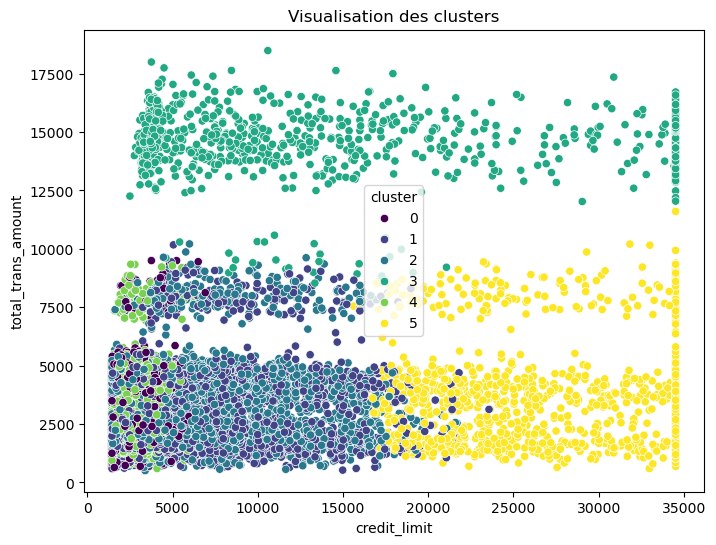

In [21]:
optimal_k = 6 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster][features].mean())

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='credit_limit', y='total_trans_amount', hue='cluster', palette='viridis')
plt.title('Visualisation des clusters')
plt.show()

In [27]:
model = KMeans(n_clusters = 6)
y = model.fit_predict(X)
y

array([1, 1, 5, ..., 4, 5, 4], dtype=int32)

In [28]:
df['CLUSTER'] = y + 1
df.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster,CLUSTER
0,45,M,3,High School,Married,69000.0,39,5,1,12691.0,1144,42,0.061,2,2
1,49,F,5,Graduate,Single,24000.0,44,6,1,8256.0,1291,33,0.105,1,2
2,51,M,3,Graduate,Married,93000.0,36,4,1,3418.0,1887,20,0.000,1,6
3,40,F,4,High School,Unknown,24000.0,34,3,4,3313.0,1171,20,0.760,0,6
4,40,M,3,Uneducated,Married,69000.0,21,5,1,4716.0,816,28,0.000,2,6


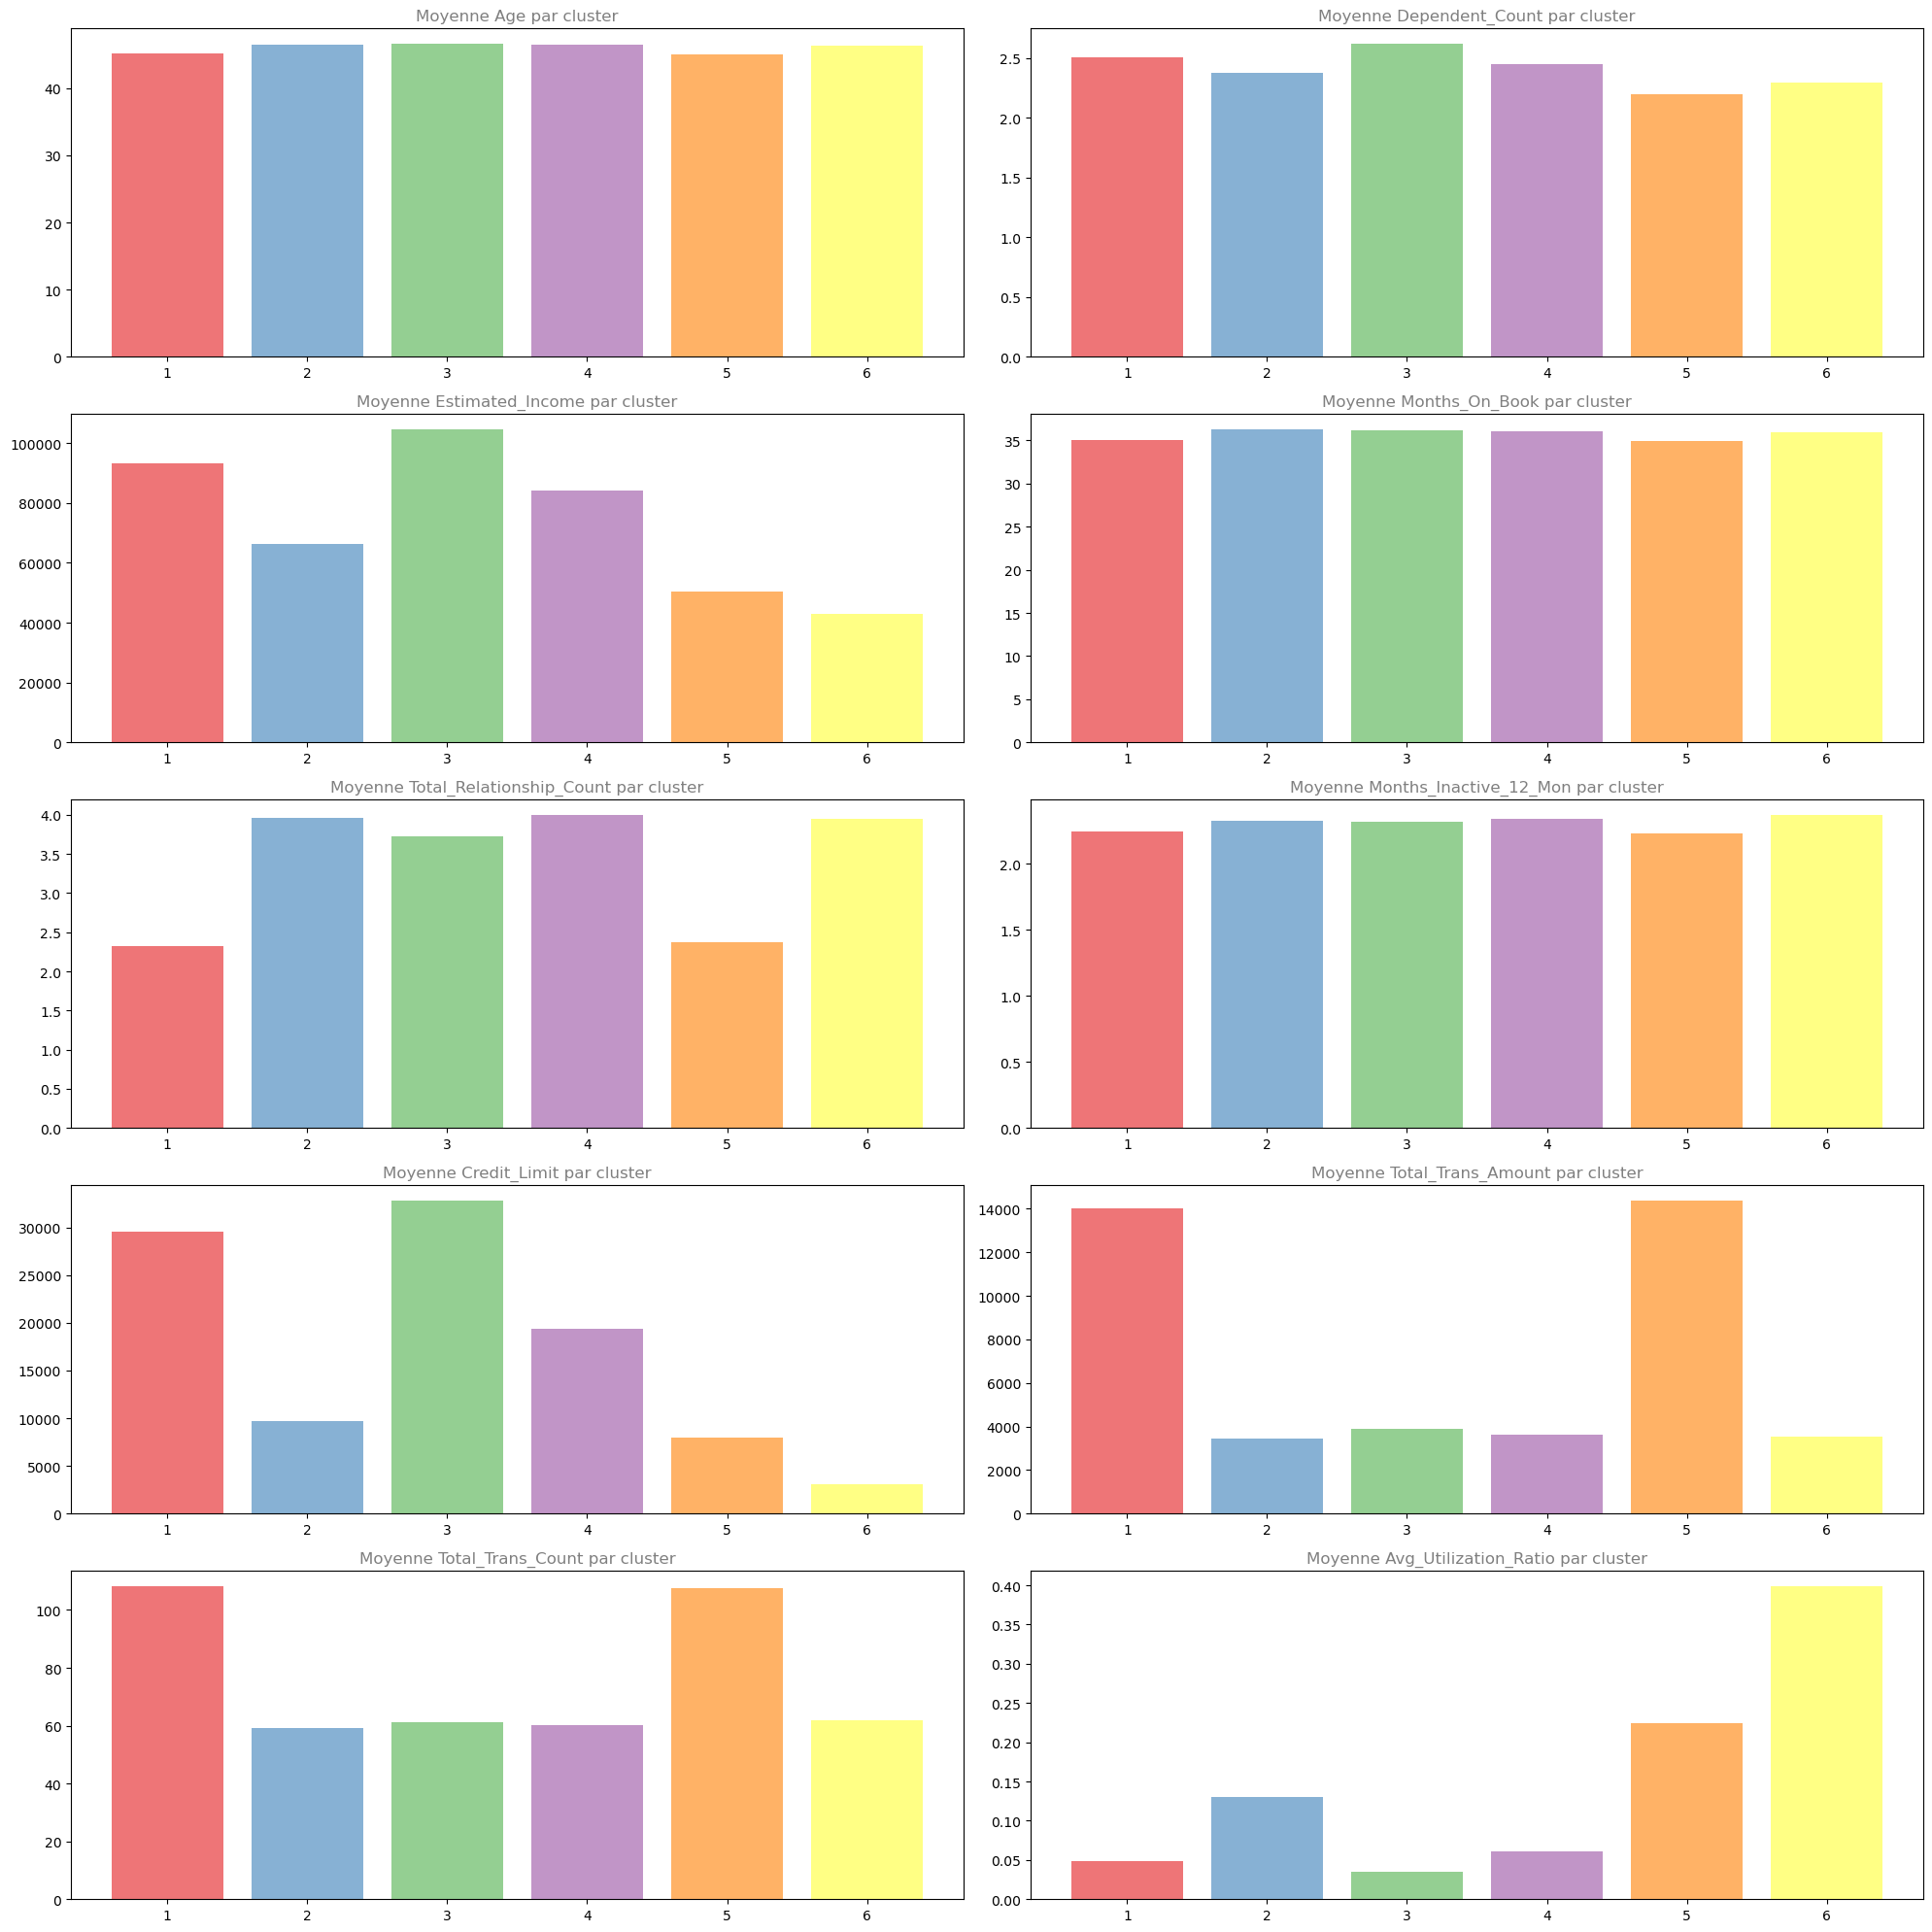

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=np.number).drop(['CLUSTER'], axis=1).columns

# Limiter à 10 colonnes
numeric_columns = numeric_columns[:10]

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i + 1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Moyenne {column.title()} par cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


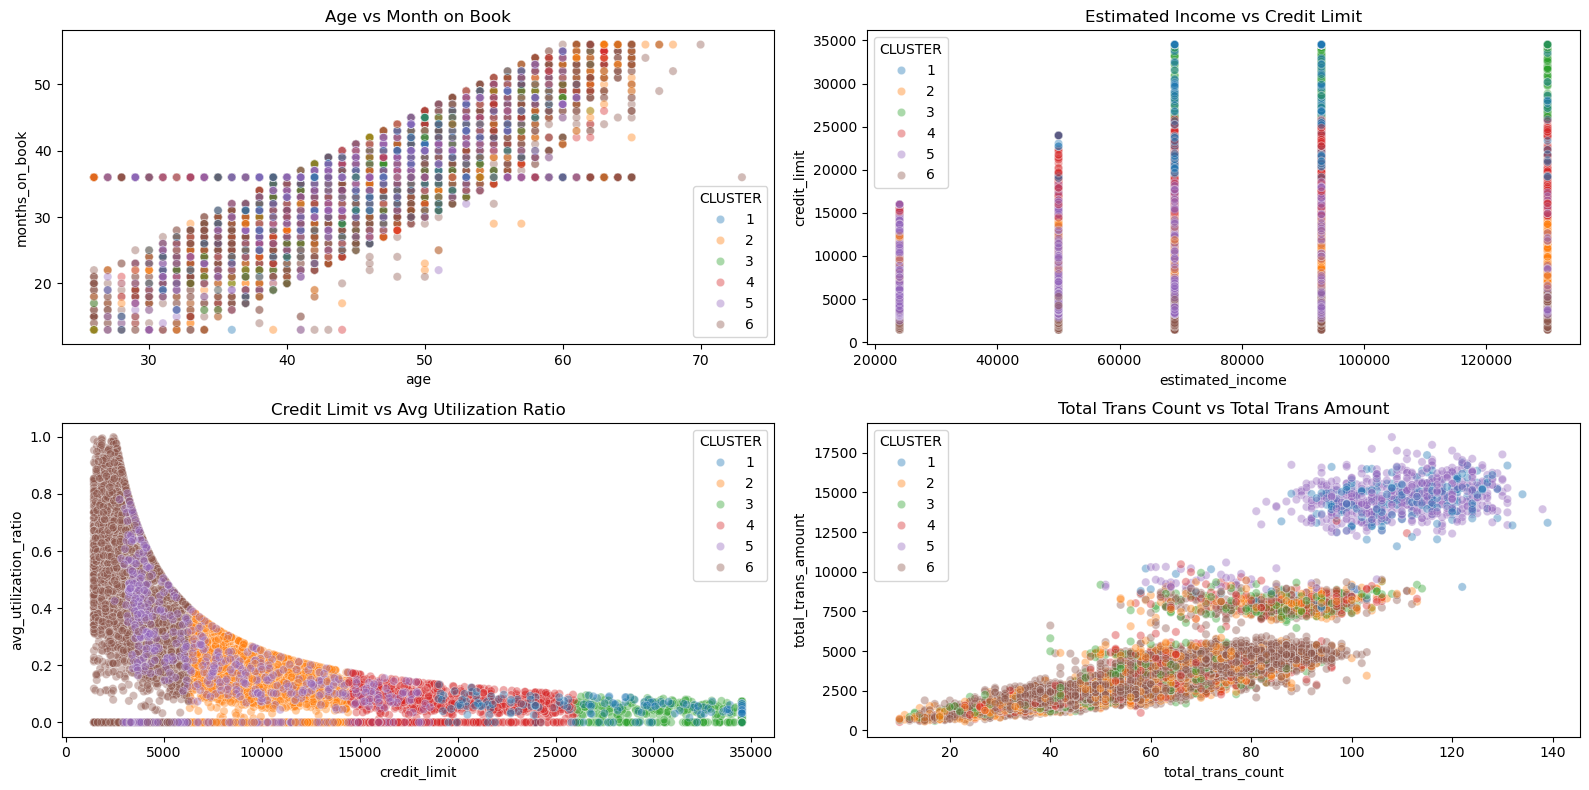

In [47]:
df.columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
ax1.set_title('Age vs Month on Book')

sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2)
ax2.set_title('Estimated Income vs Credit Limit')

sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
ax3.set_title('Credit Limit vs Avg Utilization Ratio')

sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4)
ax4.set_title('Total Trans Count vs Total Trans Amount')

plt.tight_layout()
plt.show()


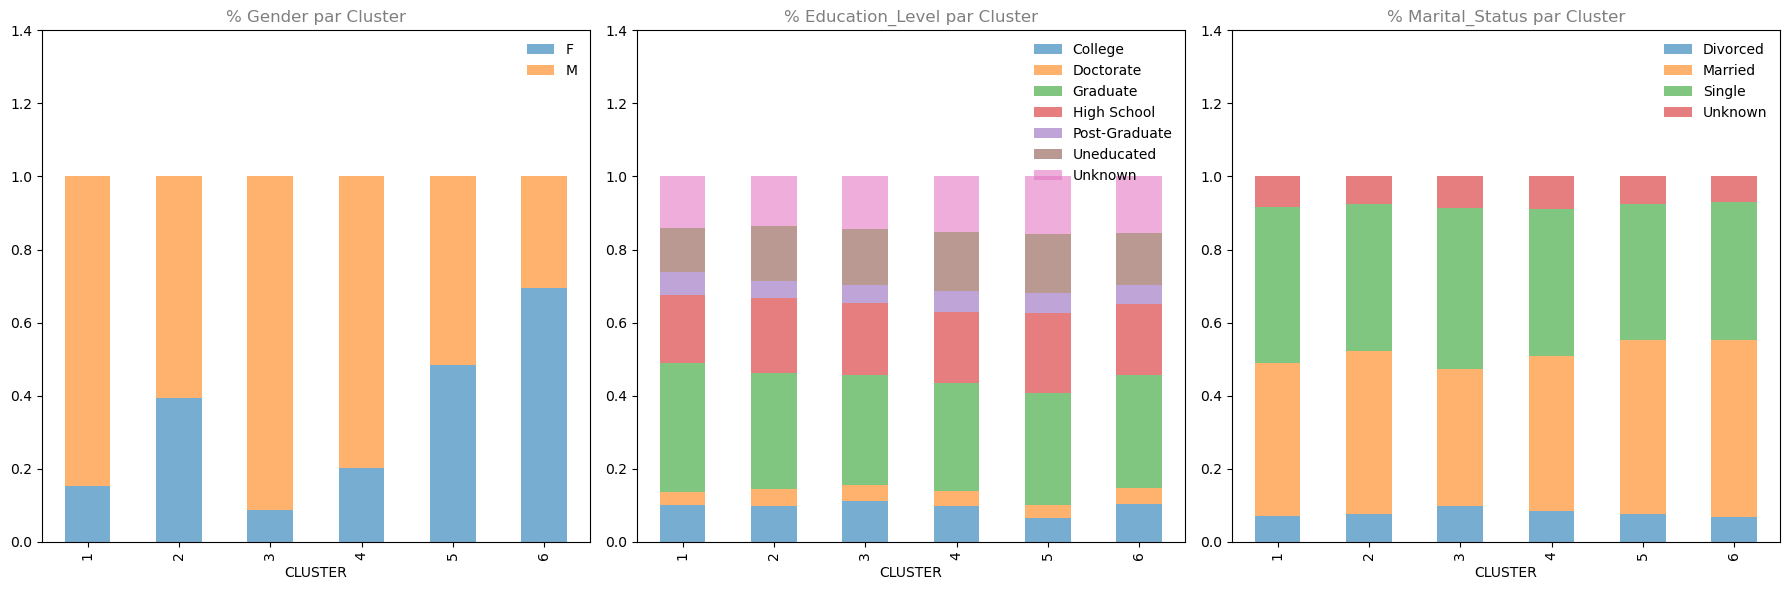

In [53]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} par Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]

plt.tight_layout()
plt.show()